In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
f = open('sem6_trp_arma_input.txt', 'r')
rp = [float(line.strip()) for line in f]

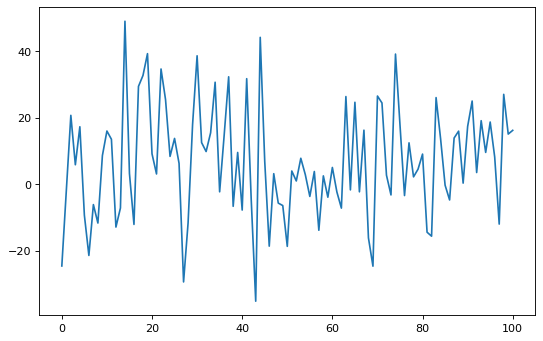

In [3]:
plt.figure(figsize=(8, 5), dpi=80)
plt.plot(rp[:101])

In [4]:
exp_val = sum(i for i in rp) / len(rp)
var = sum((i - exp_val) ** 2 for i in rp) / (len(rp) - 1)
stand_dev = var ** 0.5

print(exp_val, var, stand_dev)

7.835292799999992 330.5082437834249 18.17988569225409


In [5]:
def R_k(k: int) -> float:
    return sum((rp[i] - exp_val)*(rp[i+k] - exp_val) for i in range(len(rp) - k)) / (len(rp) - k -1)

def r_k(k: int) -> float:
    return R_k(k) / R_k(0)

In [6]:
r = [R_k(i) for i in range(10)]
print(r)

[330.5082437834249, -31.504994269745143, -122.69152348801357, 63.175455758260554, -3.836395453914499, -3.502421354278224, -0.5178107858590788, 9.193187614833635, 4.182726000076415, -8.770793049607763]


In [13]:
p = [r_k(i) for i in range(10) if abs(r_k(i)) < math.exp(-1)]
koef = min(p)
print(p)

[-0.09532286973873397, 0.19114638423257635, -0.011607563581465181, -0.010597077138485195, -0.001566710651242906, 0.027815305027180312, 0.01265543622209093, -0.026537289809191806]


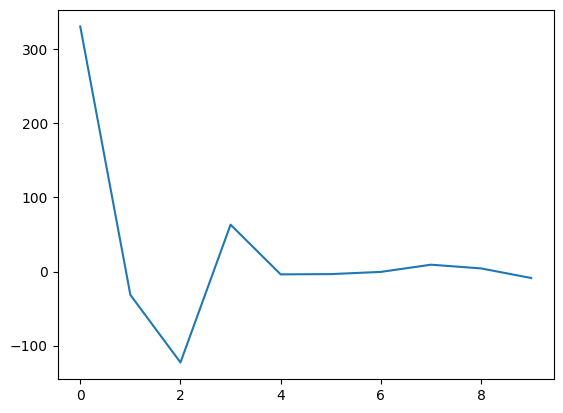

In [15]:
plt.plot(r)
plt.plot([0]*len(r), [koef*i for i in range(len(r))], color='r')